<a href="https://colab.research.google.com/github/Ahtesham519/jupyter-notebook_python/blob/main/Clustring_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# set up library imports and define a felper function to display nimpy arrays

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from collections import defaultdict

In [3]:
# Useful in beautifying numpy arrays

from IPython.display import HTML,display
import tabulate

def pp(a,show_head=False):
  '''
  args: show_head -> if True print only first 5 rows
  '''
  if a.ndim < 2:
    a = [a]
  if show_head:
    display(HTML(tabulate.tabulate(a[:5] , tablefmt = 'html')))
    return
  display(HTML(tabulate.tabulate(a, tablefmt='html')))

# **Unsupervised Learning**

K-means

(-6.0, 6.0, -3.0, 3.0)

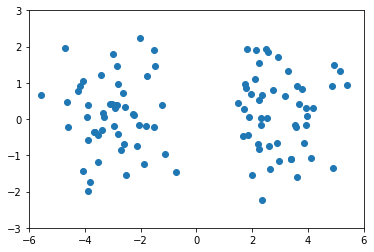

In [4]:
np.random.seed(0)
X= np.vstack([np.random.randn(50,2) + [-3, 0] , np.random.randn(50,2) + [ 3,0]])
plt.scatter(X[:,0] , X[:,1])
plt.axis([-6, 6, -3, 3])

Train a Kmeans and find Centroids Assigned

In [6]:
kmeans = KMeans(n_clusters=2 , random_state = 0).fit(X)
pp(kmeans.labels_)  #labelod each datapoint

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


# **Final Centroids Found:**

In [7]:
kmeans.cluster_centers_

array([[-2.98319384,  0.10280987],
       [ 2.98127847,  0.18274747]])

Nearest Neighbour

In [9]:
neigh = NearestNeighbors(n_neighbors=3 , radius = 0.4)
neigh.fit(X)

NearestNeighbors(n_neighbors=3, radius=0.4)

In [10]:
X.shape

(100, 2)

# **Closest points for each example in X**

In [12]:
#print closest indexes for each of the 100 examples

closes_points_indexes = neigh.radius_neighbors(radius = 3) [1]  #points within radious 1
pp(closes_points_indexes)

[ 1 49 48 3 4 5 6 7 47 9 11 46 13 45 15 17 44 19 22 25 26 27 28 29 30 32 34 35 41 37 38 39 40 42 36 43 18 2 8 14 12 70 95],[49 48 3 4 5 6 7 47 11 46 13 45 15 17 44 19 21 23 25 27 28 32 34 35 37 39 40 42 43 18 0 8 14],[49 3 4 5 6 7 47 9 11 46 13 15 16 17 19 20 22 26 27 28 29 30 31 32 34 35 41 37 38 39 42 36 43 18 0 8 14 12 70 74],[ 1 49 48 4 5 6 7 47 9 11 46 13 45 15 16 17 44 19 20 22 23 24 25 26 27 28 29 30 31 32 33 34 35 41 37 38 39 40 42 36 43 18 2 0 8 14 12],[ 1 49 48 3 5 6 7 47 9 10 11 46 13 45 15 16 17 44 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 41 37 38 39 40 42 36 43 18 2 0 8 14],[ 1 49 48 3 4 6 7 47 9 10 11 46 13 45 15 17 44 19 21 22 23 24 25 26 27 28 29 30 32 33 34 35 37 38 39 40 42 36 43 18 2 0 8 14],[ 1 49 48 3 4 5 7 47 9 11 46 13 45 15 16 17 44 19 20 22 23 24 25 26 27 28 29 30 31 32 33 34 35 41 37 38 39 40 42 36 43 18 2 0 8 14 12],[ 1 49 48 3 4 5 6 47 9 11 46 13 45 15 16 17 44 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 41 37 38 39 40 42 36 43 18 2 0 8 14 12],[ 1 49 48 3 4 5 6 7 47 9 11 46 13 45 15 16 17 44 19 20 22 23 25 26 27 28 29 30 31 32 34 35 41 37 38 39 40 42 36 43 18 2 0 14 12],[49 48 3 4 5 6 7 47 11 46 13 45 15 16 17 44 19 20 22 23 24 25 26 27 28 29 30 31 32 33 34 35 41 37 38 39 40 42 36 43 18 2 0 8 14 12],[49 48 4 5 47 46 13 45 15 17 44 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 38 39 40],[ 1 49 48 3 4 5 6 7 47 9 46 13 45 15 16 17 44 19 20 22 23 24 25 26 27 28 29 30 31 32 33 34 35 41 37 38 39 40 42 36 43 18 2 0 8 14 12],[49 3 6 7 47 9 11 13 15 19 22 26 27 28 32 35 41 37 39 36 43 18 2 0 8 70 74 95 79 83],[ 1 49 48 3 4 5 6 7 47 9 10 11 46 45 15 16 17 44 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 41 37 38 39 40 42 36 43 18 2 0 8 14 12],[ 1 49 48 3 4 5 6 7 47 9 11 46 13 45 15 17 44 19 22 23 25 27 28 29 30 32 34 35 37 39 40 42 36 43 18 2 0 8],[ 1 49 48 3 4 5 6 7 47 9 10 11 46 13 45 16 17 44 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 41 37 38 39 40 42 36 43 18 2 0 8 14 12],[49 3 4 6 7 47 9 11 13 15 17 19 20 22 23 24 25 26 27 28 29 30 31 32 33 34 35 41 37 38 39 40 36 43 2 8],[ 1 49 48 3 4 5 6 7 47 9 10 11 46 13 45 15 16 44 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 41 37 38 39 40 42 36 43 18 2 0 8 14],[ 1 49 48 3 4 5 6 7 47 9 11 46 13 45 15 17 44 19 22 23 25 26 27 28 29 30 32 33 34 35 41 37 38 39 40 42 36 43 2 0 8 14 12],[ 1 49 48 3 4 5 6 7 47 9 10 11 46 13 45 15 16 17 44 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 41 37 38 39 40 42 36 43 18 2 0 8 14 12],[49 3 4 6 7 47 9 10 11 46 13 45 15 16 17 44 19 22 23 24 25 26 27 28 29 30 31 32 33 34 35 41 37 38 39 40 36 43 2 8],[ 1 49 48 4 5 7 47 10 46 13 45 15 17 44 19 22 23 24 25 27 28 29 30 33 34 38 39 40],[49 48 3 4 5 6 7 47 9 10 11 46 13 45 15 16 17 44 19 20 21 23 24 25 26 27 28 29 30 31 32 33 34 35 41 37 38 39 40 36 43 18 2 0 8 14 12],[ 1 49 48 3 4 5 6 7 47 9 10 11 46 13 45 15 16 17 44 19 20 21 22 24 25 26 27 28 29 30 31 32 33 34 35 41 37 38 39 40 42 43 18 8 14],[49 48 3 4 5 6 7 47 9 10 11 46 13 45 15 16 17 44 19 20 21 22 23 25 26 27 28 29 30 31 32 33 34 35 41 37 38 39 40 36 43],[ 1 49 48 3 4 5 6 7 47 9 10 11 46 13 45 15 16 17 44 19 20 21 22 23 24 26 27 28 29 30 31 32 33 34 35 41 37 38 39 40 42 36 43 18 0 8 14],[49 3 4 5 6 7 47 9 10 11 46 13 45 15 16 17 44 19 20 22 23 24 25 27 28 29 30 31 32 33 34 35 41 37 38 39 40 36 43 18 2 0 8 12],[ 1 49 48 3 4 5 6 7 47 9 10 11 46 13 45 15 16 17 44 19 20 21 22 23 24 25 26 28 29 30 31 32 33 34 35 41 37 38 39 40 42 36 43 18 2 0 8 14 12],[ 1 49 48 3 4 5 6 7 47 9 10 11 46 13 45 15 16 17 44 19 20 21 22 23 24 25 26 27 29 30 31 32 33 34 35 41 37 38 39 40 42 36 43 18 2 0 8 14 12],[49 48 3 4 5 6 7 47 9 10 11 46 13 45 15 16 17 44 19 20 21 22 23 24 25 26 27 28 30 31 32 33 34 35 41 37 38 39 40 36 43 18 2 0 8 14],[49 48 3 4 5 6 7 47 9 10 11 46 13 45 15 16 17 44 19 20 21 22 23 24 25 26 27 28 29 31 32 33 34 35 41 37 38 39 40 36 43 18 2 0 8 14],[49 3 4 6 7 47 9 10 11 46 13 45 15 16 17 44 19 20 22 23 24 25 26 27 28 29 30 32 33 34 35 41 37 38 39 40 36 43 2 8],[ 1 49 48 3 4 5 6 7 47 9 10 11 46 13 45 

Distance of the Closest datapoints

In [15]:
# print corresponding distances

closes_points_distances = neigh.radius_neighbors(radius = 2.5) [0]  #points wwithin radius 1 
pp(closes_points_distances)

[2.00125651 1.63714128 2.23498257 0.98321179 1.86730039 1.93276734 1.04095661 1.32186205 1.44064932 1.9179434 1.45403208 1.65914873 1.81590286 2.31798191 1.60925523 2.12599071 2.26315759 2.42329617 1.79245602 1.70034347 1.777776 1.06989784 2.33140832 1.74109451 2.10391683 1.52094702 1.75024547 0.82403847 0.96356768 1.38131852 0.66279136 1.09392835 1.92223566],[2.02661656 1.06982728 2.39242195 2.12617245 1.14694608 2.13037065 1.98080156 1.65574284 1.48052417 1.71666114 2.03676127 2.47089563 2.36813325 2.07346736 2.14234074 2.12661442 0.61533122 2.42906908 1.06854515 2.00125651 2.49974883 0.94985634],[2.22086161 1.23446157 2.41042781 1.55951421 1.93533006 2.26253274 1.5593633 1.03030645 1.98574971 2.18409103 2.48865783 2.35374105 2.43759486 2.38704088 2.35999359 2.20941335 1.78542499 1.58742591 1.50922295 1.4941206 2.41174782 0.77236261 1.0536544 2.27090674 1.38131852 0.85770345 2.4694347 0.62399912],[2.39242195 0.99187282 2.15306236 1.19383853 1.79659631 0.3320945 0.70108454 1.04333617 0.94849187 0.59698423 1.35006026 0.90503929 1.9283827 0.95532211 1.33397472 2.35324748 1.34590641 2.36729116 1.48763211 2.39070172 1.9224455 1.78706938 1.13712483 0.99330706 1.5984492 1.63585157 2.36418836 0.8122309 1.86848003 0.35697428 1.46716703 0.76459042 1.87039409 1.27859434 2.36248247 2.116799 1.09988334 0.23046855 1.38243167 1.23446157 0.98321179 0.54664466 1.72228013 1.85454845],[2.12617245 0.23029192 1.37996559 1.19383853 1.07256525 0.91127175 0.5524637 0.54664395 1.33144509 2.46179539 1.50506479 0.64608846 0.61606655 0.86548813 0.26019593 0.35287056 1.16218268 0.76742787 2.06029443 2.22304261 0.9409748 1.20670451 1.63422834 0.792602 1.64260211 0.07710361 0.20125034 0.93814972 0.95768971 2.2517233 0.85948936 1.52787091 0.88044075 0.87866165 2.02825551 1.20644577 1.25227158 0.41112746 1.16962426 2.17689423 2.06192253 1.41146653 1.55085956 2.41042781 1.86730039 1.7118753 1.94870803],[1.14694608 1.05242359 0.35747789 1.79659631 1.07256525 1.46850282 1.16001481 0.77726236 2.31454914 2.31155959 0.48193398 1.64439722 0.59430188 1.07616623 1.38803045 1.2789008 1.8351879 1.91577012 2.00207352 1.55215799 2.42266238 1.48992019 1.04029706 1.15440776 1.97671329 1.98913197 1.85635462 2.03248353 1.75266768 1.44868048 2.15462213 2.27233174 1.47046736 1.42136941 1.41489265 1.9342396 1.11507094 1.93276734 2.13923109 1.38881757],[2.13037065 0.69331916 1.82561043 0.3320945 0.91127175 1.46850282 0.38150146 0.71124168 1.0736879 0.87000624 1.01809142 0.77911369 1.60221425 0.65812711 1.10949182 2.05560898 1.22413164 2.37727483 1.38851436 2.11792763 2.39836456 1.67760307 1.82032643 0.84670335 0.71766722 1.47705385 1.51211692 2.42755075 0.78396978 2.41544284 1.66979266 0.03277234 1.68402523 0.88265571 1.77584343 1.07458893 2.07780547 1.91746624 1.40828017 0.51523851 1.17818558 1.55951421 1.04095661 0.80260178 1.55300883 2.18177243],[1.98080156 0.32422981 1.51547926 0.70108454 0.5524637 1.16001481 0.38150146 0.38302642 1.19494987 1.1551242 0.68476671 0.65557654 1.22775832 0.29232096 0.81138926 1.67737332 1.04658671 2.30276848 1.22669784 1.75374543 2.12907247 1.34038708 1.79011617 0.48144259 0.37863386 1.28354125 1.3140559 2.41319197 0.78222961 2.0780761 1.38022058 0.35107436 1.87004508 1.01933044 1.60032245 0.80477588 1.70604356 1.87916565 1.71579867 0.89659697 1.17180093 1.93533006 1.32186205 1.1803787 1.57337763],[2.49974883 1.49591905 2.48298254 0.54664466 1.7118753 2.13923109 0.80260178 1.1803787 1.45795896 1.3475562 0.82754239 1.74640689 1.44843209 2.37436974 1.4606631 1.87713056 1.8839122 2.01722305 2.46180102 2.22959863 1.64881449 1.51513076 2.13422677 2.1720339 1.33125333 2.41510163 0.83478006 1.68209072 1.19245817 2.39421904 1.82444389 2.10105552 1.0890418 0.31630761 1.43204324 0.85770345 0.66279136 1.67496418 1.47043929],[1.26980459 0.94849187 1.33144509 2.31454914 1.0736879 1.19494987 1.56126942 0.56261506 1.83373153 0.71848846 2.19659467 1.24236164 1.64666437 1.20743235 2.35743762 0.89164342 1.47454358 0.92192291 2.26141556 2.03089464 1.73223315 0.88

Clustring the closest examples

In [17]:
clusters = defaultdict(list)
already_assigned_datapoints = set()
cluster_id = 0

for idx, closest_datapoints in enumerate(closes_points_indexes):
  "Add these points to set- to keep track"
  #first add this element

  if idx not in already_assigned_datapoints:
    already_assigned_datapoints.add(idx)
    clusters[cluster_id].append(idx)
  
  #now add its closed neighbors
  for _datapoint in closest_datapoints:
    if _datapoint not in already_assigned_datapoints:
      already_assigned_datapoints.add(_datapoint)
      clusters[cluster_id].append(_datapoint)
  cluster_id = cluster_id +1

Arbitrary cluster id (on the left

In [19]:
array = np.array(list(clusters.items()))
pp(array)

<ipython-input-19-7a2be1521449>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = np.array(list(clusters.items()))


0,"[0, 1, 49, 48, 3, 4, 5, 6, 7, 47, 9, 11, 46, 13, 45, 15, 17, 44, 19, 22, 25, 26, 27, 28, 29, 30, 32, 34, 35, 41, 37, 38, 39, 40, 42, 36, 43, 18, 2, 8, 14, 12, 70, 95]"
1,"[21, 23]"
2,"[16, 20, 31, 74]"
3,"[24, 33]"
4,[10]
12,"[79, 83]"
50,"[50, 91, 90, 89, 62, 88, 66, 53, 76, 77, 96, 78, 97, 81, 71, 69, 84, 85, 86, 68, 64, 60, 59, 92, 58, 55, 98, 72, 54, 99]"
51,"[51, 52, 82, 57, 93, 63, 65, 67, 87, 56, 94, 80, 73, 75, 61]"
